In [1]:
from pathlib import Path
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import graphviz 

In [2]:
data_path = Path("./Data/")
file = []
for files in data_path.glob('*.csv'):
    temp = pd.read_csv(files)
    file.append(temp)
    
X_temp = file[0]
chemical_comp_temp = file[1]

In [3]:
X_temp.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [4]:
X = X_temp.drop(columns =['critical_temp'])
y = X_temp['critical_temp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1)

In [5]:
def MSE(data, model):
    """
    Calculates the Mean Squared Error if both data and model are vectos
    Calculates Variance if data is vector and model is the mean value of the data
    """
    n = np.shape(data)[0]
    res = np.array(data - model)
    return (1.0/n) *(res.T.dot(res))

In [6]:
tree_reg= tree.DecisionTreeRegressor(max_depth = 3)
tree_reg.fit(X_train, y_train)
y_predict = tree_reg.predict(X_test)
y_train_predict = tree_reg.predict(X_train)

#print("Train set R2 score is: {:.2f}".format(tree_reg.score(X_train,y_train)))
print("Test set R2 score is: {:.2f}".format(tree_reg.score(X_test,y_test)))

mse_predict = MSE(y_test, y_predict)
print('Test set mse is: {:.2f}'.format(mse_predict))

print('The number of leaves in the decision tree is:',tree_reg.get_n_leaves())

Test set R2 score is: 0.70
Test set mse is: 346.99
The number of leaves in the decision tree is: 8


In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

tree_reg= tree.DecisionTreeRegressor(max_depth = 3)
tree_reg.fit(X_train_scaled, y_train)
y_train_predict = tree_reg.predict(X_train_scaled)

y_predict = tree_reg.predict(X_test_scaled)
print("Test set R2 score is: {:.2f}".format(tree_reg.score(X_test_scaled,y_test)))

mse_predict = MSE(y_test, y_predict)
print('Test set mse is: {:.2f}'.format(mse_predict))

print('The number of leaves in the decision tree is:',tree_reg.get_n_leaves())

Test set R2 score is: 0.70
Test set mse is: 346.99
The number of leaves in the decision tree is: 8


[Text(167.4, 190.26, 'X[67] <= 399.896\nentropy = 1173.5\nsamples = 19136\nvalue = 34.473'),
 Text(83.7, 135.9, 'X[31] <= 5541.292\nentropy = 116.498\nsamples = 9581\nvalue = 9.528'),
 Text(41.85, 81.53999999999999, 'X[35] <= 1.082\nentropy = 199.966\nsamples = 3345\nvalue = 15.87'),
 Text(20.925, 27.180000000000007, 'entropy = 148.399\nsamples = 2084\nvalue = 11.659'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 207.444\nsamples = 1261\nvalue = 22.83'),
 Text(125.55000000000001, 81.53999999999999, 'X[2] <= 99.665\nentropy = 38.58\nsamples = 6236\nvalue = 6.126'),
 Text(104.625, 27.180000000000007, 'entropy = 51.039\nsamples = 3640\nvalue = 7.943'),
 Text(146.475, 27.180000000000007, 'entropy = 9.997\nsamples = 2596\nvalue = 3.579'),
 Text(251.10000000000002, 135.9, 'X[64] <= 0.837\nentropy = 983.768\nsamples = 9555\nvalue = 59.486'),
 Text(209.25, 81.53999999999999, 'X[74] <= 2.155\nentropy = 343.838\nsamples = 2142\nvalue = 28.143'),
 Text(188.32500000000002, 27.18000000

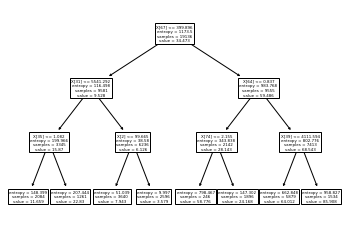

In [9]:
tree.plot_tree(tree_reg.fit(X_train, y_train)) 

In [12]:
#dot_data = tree.export_graphviz(tree_reg, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph.render("supercon") 